## Ejercicio Nro. 9 - Tópicos de series

## Librerías

In [36]:
# Instalación
packages <- c("data.table", "dplyr", "textclean", "purrr", "stringr", "tm", "textstem", "tidytext", "topicmodels", 
              "ggplot2", "scales", "tidyr", "wordcloud")
if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
  install.packages(setdiff(packages, rownames(installed.packages())))  
}


library("data.table")
library("dplyr")
library("textclean")
library("purrr")
library("stringr")
library("tm")
library("textstem")
library("tidytext")
library("topicmodels")
library("ggplot2")
library("scales")
library("tidyr")
library("wordcloud")

## Cargo datos

In [2]:
setwd("C:/Users/ig/Desktop/txm/tps/tp9")
game_of_thrones <- fread("Game_of_Thrones_Script.csv")
the_simpsons    <- fread("simpsons_dataset.csv")

In [3]:
head(game_of_thrones)

Release Date,Season,Episode,Episode Title,Name,Sentence
2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,"What do you expect? They're savages. One lot steals a goat from another lot and before you know it, they're ripping each other to pieces."
2011-04-17,Season 1,Episode 1,Winter is Coming,will,"I've never seen wildlings do a thing like this. I've never seen a thing like this, not ever in my life."
2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
2011-04-17,Season 1,Episode 1,Winter is Coming,royce,Do the dead frighten you?


In [4]:
head(the_simpsons)

raw_character_text,spoken_words
Miss Hoover,"No, actually, it was a little of both. Sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it."
Lisa Simpson,Where's Mr. Bergstrom?
Miss Hoover,I don't know. Although I'd sure like to talk to him. He didn't touch my lesson plan. What did he teach you?
Lisa Simpson,That life is worth living.
Edna Krabappel-Flanders,"The polls will be open from now until the end of recess. Now, just in case any of you have decided to put any thought into this, we'll have our final statements. Martin?"
Martin Prince,I don't think there's anything left to say.


## Selección de personajes

In [5]:
# Selecciono los 20 personajes de Games of Thrones con más sentencias (documentos) en el dataset.
# Dentro del top 20 está el personaje "man", el cual elimino y me quedo con los 19 restantes.
personajes_got <- game_of_thrones %>%
    count(Name,sort = TRUE) %>%
    top_n(20)  %>%
    select(Name) %>%
    filter(Name !="man") %>%
    pull()

personajes_got

Selecting by n


[1] "tyrion lannister"   "jon snow"           "daenerys targaryen"
 [4] "cersei lannister"   "jaime lannister"    "sansa stark"       
 [7] "arya stark"         "davos"              "theon greyjoy"     
[10] "petyr baelish"      "bran stark"         "sam"               
[13] "bronn"              "jorah mormont"      "tywin lannister"   
[16] "varys"              "brienne"            "eddard stark"      
[19] "robb stark"

In [6]:
# Selecciono los 20 personajes de Los Simpsons con más sentencias en el dataset.
personajes_ts <- the_simpsons %>%
    count(raw_character_text, sort = TRUE) %>%
    top_n(20)  %>%
    select(raw_character_text) %>%
    filter(raw_character_text !="") %>%
    pull()

personajes_ts

Selecting by n


[1] "Homer Simpson"           "Marge Simpson"          
 [3] "Bart Simpson"            "Lisa Simpson"           
 [5] "C. Montgomery Burns"     "Moe Szyslak"            
 [7] "Seymour Skinner"         "Ned Flanders"           
 [9] "Grampa Simpson"          "Milhouse Van Houten"    
[11] "Chief Wiggum"            "Krusty the Clown"       
[13] "Nelson Muntz"            "Lenny Leonard"          
[15] "Apu Nahasapeemapetilon"  "Waylon Smithers"        
[17] "Kent Brockman"           "Carl Carlson"           
[19] "Edna Krabappel-Flanders"

### Creo dataset

In [7]:
# Me quedo con las columnas "Name" y "Sentence" y los diálogos de los personajes elegidos de Games of Thrones
game_of_thrones <- game_of_thrones %>%
 filter(Name %in% personajes_got) %>%
 select(c("Name","Sentence"))
 #mutate(Name, paste0("1_", Name))
 
# Renombro columnas
names(game_of_thrones) <- c("personaje", "texto")

head(game_of_thrones)

personaje,texto
jon snow,Go on. Father's watching.
jon snow,And your mother.
sansa stark,Thank you.
eddard stark,"And which one of you was a marksman at ten? Keep practicing, Bran. Go on."
jon snow,"Don't think too much, Bran."
robb stark,Relax your bow arm.


In [8]:
dim(game_of_thrones)

[1] 12237     2

In [9]:
# Me quedo con los diálogos de los personajes elegidos de Los Simpsons
the_simpsons <- the_simpsons %>%
 filter(raw_character_text %in% personajes_ts)
 
# Renombro columnas
names(the_simpsons) <- c("personaje", "texto")

head(the_simpsons)

personaje,texto
Lisa Simpson,Where's Mr. Bergstrom?
Lisa Simpson,That life is worth living.
Edna Krabappel-Flanders,"The polls will be open from now until the end of recess. Now, just in case any of you have decided to put any thought into this, we'll have our final statements. Martin?"
Edna Krabappel-Flanders,Bart?
Bart Simpson,Victory party under the slide!
Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!


In [10]:
dim(the_simpsons)

[1] 93970     2

In [11]:
# Junto datasets de las series
dataset_series <- data.table(rbind(game_of_thrones, the_simpsons))

head(dataset_series)

personaje,texto
jon snow,Go on. Father's watching.
jon snow,And your mother.
sansa stark,Thank you.
eddard stark,"And which one of you was a marksman at ten? Keep practicing, Bran. Go on."
jon snow,"Don't think too much, Bran."
robb stark,Relax your bow arm.


In [12]:
dim(dataset_series)

[1] 106207      2

## Limpieza de texto

### Función de limpieza

In [13]:
limpiar <- function(texto){
    # Se convierte todo el texto a minúsculas
    nuevo_texto <- tolower(texto)
    # Reemplazo contracciones en ingles
    nuevo_texto <- replace_contraction(nuevo_texto)
    # Eliminación de signos de puntuación
    nuevo_texto <- str_replace_all(nuevo_texto,"[[:punct:]]", " ")
    # Eliminación de números
    nuevo_texto <- str_replace_all(nuevo_texto,"[[:digit:]]", " ")
    # Eliminación de espacios en blanco múltiples
    nuevo_texto <- str_replace_all(nuevo_texto,"[\\s]+", " ")
    # Elimino carácteres únicos
    nuevo_texto <- gsub("\\W*\\b\\w\\b\\W*", " ", nuevo_texto)
    
    return(nuevo_texto)
}

In [14]:
# Aplico función de limpieza
dataset_series <- dataset_series %>% mutate(texto_limpio = map(.x = texto, .f = limpiar))
head(dataset_series)

personaje,texto,texto_limpio
jon snow,Go on. Father's watching.,go on father watching
jon snow,And your mother.,and your mother
sansa stark,Thank you.,thank you
eddard stark,"And which one of you was a marksman at ten? Keep practicing, Bran. Go on.",and which one of you was marksman at ten keep practicing bran go on
jon snow,"Don't think too much, Bran.",do not think too much bran
robb stark,Relax your bow arm.,relax your bow arm


### Tokenización y limpieza de palabras vacías

In [15]:
by_personaje <- dataset_series %>%
  unnest_tokens(word, texto_limpio) %>%
  anti_join(stop_words)

head(by_personaje)

Joining, by = "word"


personaje,texto,word
jon snow,Go on. Father's watching.,father
jon snow,Go on. Father's watching.,watching
jon snow,And your mother.,mother
eddard stark,"And which one of you was a marksman at ten? Keep practicing, Bran. Go on.",marksman
eddard stark,"And which one of you was a marksman at ten? Keep practicing, Bran. Go on.",ten
eddard stark,"And which one of you was a marksman at ten? Keep practicing, Bran. Go on.",practicing


### Lematizado

In [16]:
by_personaje$word <- lemmatize_words(by_personaje$word)
head(by_personaje)

personaje,texto,word
jon snow,Go on. Father's watching.,father
jon snow,Go on. Father's watching.,watch
jon snow,And your mother.,mother
eddard stark,"And which one of you was a marksman at ten? Keep practicing, Bran. Go on.",marksman
eddard stark,"And which one of you was a marksman at ten? Keep practicing, Bran. Go on.",ten
eddard stark,"And which one of you was a marksman at ten? Keep practicing, Bran. Go on.",practice


### Conteo de palabras

In [17]:
palabras_cantidad <- by_personaje %>%
  count(personaje, word, sort = TRUE) %>%
  ungroup()

head(palabras_cantidad, 10)

personaje,word,n
Homer Simpson,marge,1822
Marge Simpson,homer,1384
Lisa Simpson,dad,1138
Homer Simpson,hey,959
Bart Simpson,dad,935
Lisa Simpson,bart,786
Homer Simpson,yes,742
Homer Simpson,gonna,732
Bart Simpson,hey,680
Homer Simpson,uh,672


## Matriz DTM

In [18]:
# Genero la matriz correspondiente
dtm <- palabras_cantidad %>%
  cast_dtm(document  = personaje, 
           term      = word, 
           value     = n)

dtm

<<DocumentTermMatrix (documents: 38, terms: 23868)>>
Non-/sparse entries: 88192/818792
Sparsity           : 90%
Maximal term length: 37
Weighting          : term frequency (tf)

## LDA

In [19]:
# Aplico algoritmo lda
topicos_lda <- LDA(dtm, k = 2, control = list(seed = 45566))
topicos_lda

A LDA_VEM topic model with 2 topics.

## Probabilidad de las palabras en cada tópico

In [20]:
# la probabilidad de que una palabra se genere en un tópico se define por el valor beta
topicos_lda_beta <- tidy(topicos_lda, matrix = "beta")
head(topicos_lda_beta)

topic,term,beta
1,marge,7.018151e-03
2,marge,5.321737e-18
1,homer,9.905792e-03
2,homer,1.346059e-13
1,dad,8.057561e-03
2,dad,9.766631e-04


### Wordcloud de tópicos
Se crea una nube de palabras por cada tópico para obtener una impresión general de las palabras más frecuentes en cada tópico definida por el valor β.

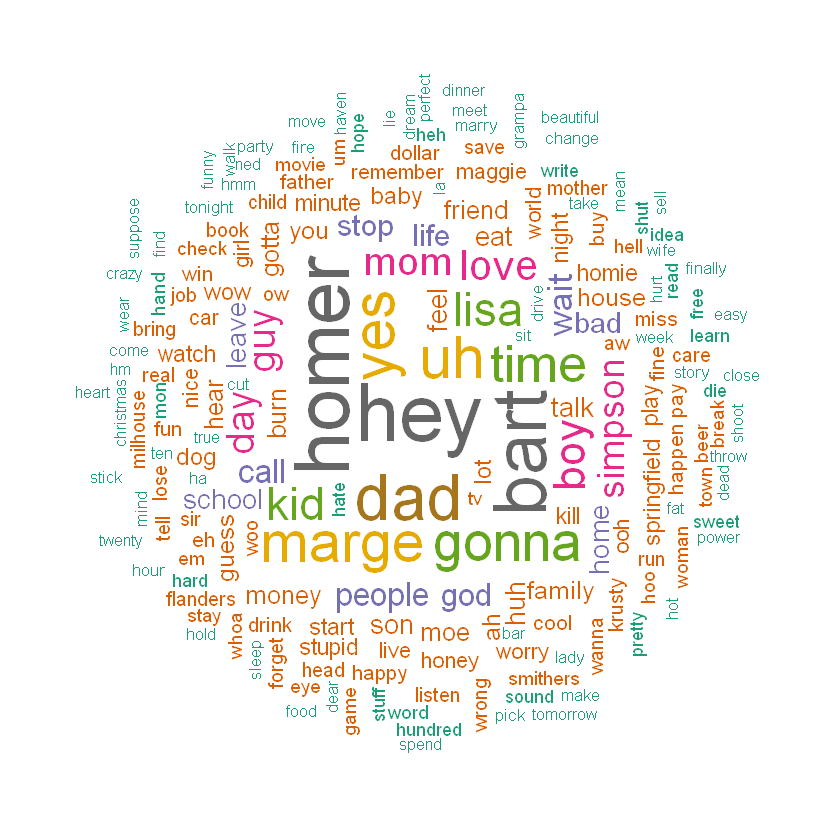

In [21]:
# Wordcloud Tópico 1
wc_t1 <- data.frame(term = topicos_lda@terms, p = exp(topicos_lda@beta[1,]))

gt1 <- wordcloud(words = wc_t1$term,
                 freq = wc_t1$p,
                 max.words = 200,
                 random.order = FALSE,
                 rot.per = 0.35,
                 colors=brewer.pal(8, "Dark2"))

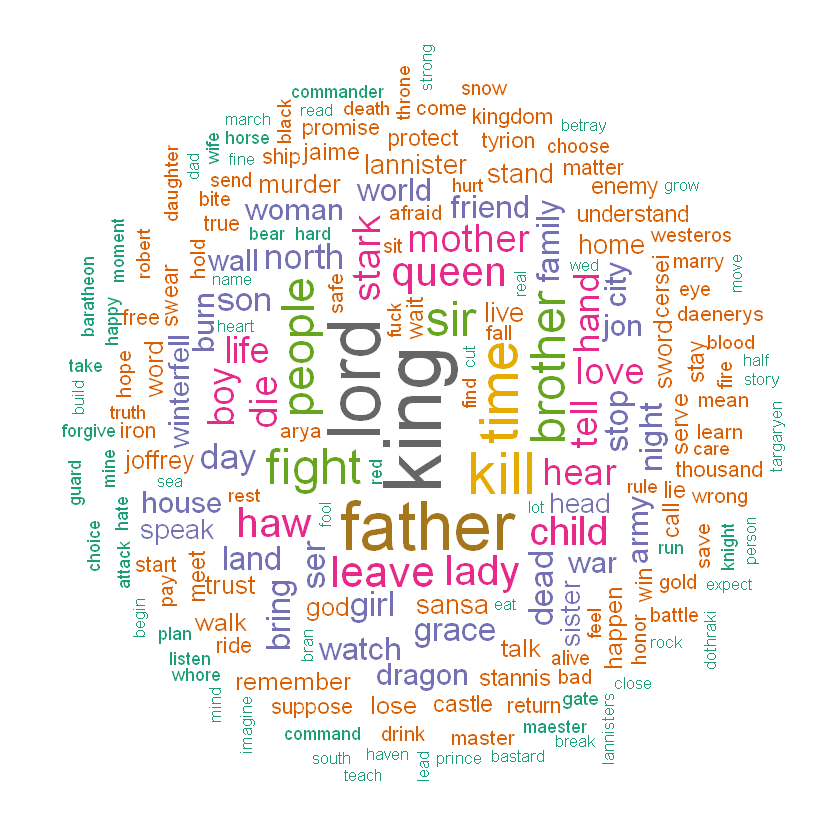

In [22]:
# Wordcloud Tópico 2
wc_t2 <- data.frame(term = topicos_lda@terms, p = exp(topicos_lda@beta[2,]))

gt2 <- wordcloud(words = wc_t2$term,
                 freq = wc_t2$p,
                 max.words = 200,
                 random.order = FALSE,
                 rot.per = 0.35,
                 colors=brewer.pal(8, "Dark2"))

Se aprecia como el tópico 1 se relaciona mejor con la serie "The Simpsons" a través de palabras como "homer" o "marge", es decir, es más probable que dichas palabras se generen a partir del tópico 1. Por otro lado, el tópico 2 se vincula mejor a la serie "Games of Thrones" con palabras como "king" o "lord". 

###  Términos más frecuentes en cada tópico

In [23]:
# Se filtran los 10 términos más frecuentes de cada tópico
terminos_frecuentes <- topicos_lda_beta %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

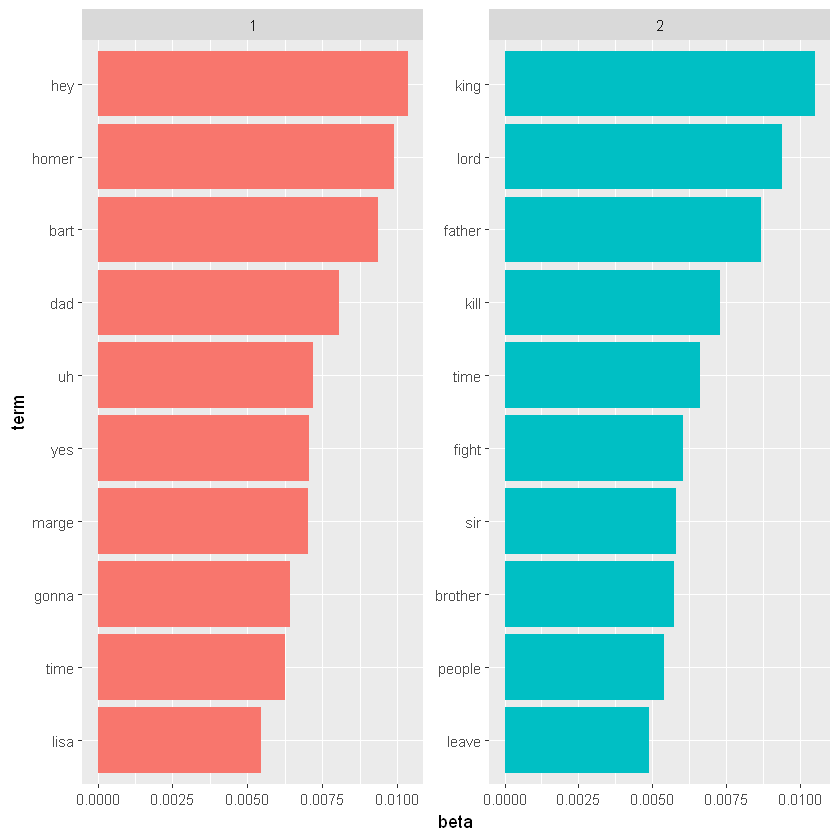

In [24]:
# Gráfico de los 10 términos más frecuentes en cada tópico
terminos_frecuentes %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

Al igual que en las nubes de palabras, en la figura anterior se observan las palabras más representativas de cada tópico, donde el tópico N° 1 hace referencia a la serie "The Simpsons" y el N° 2 a la serie "Games of Thrones".

Como alternativa, podríamos graficar los términos que tuvieron la mayor diferencia de β entre ambos tópicos.

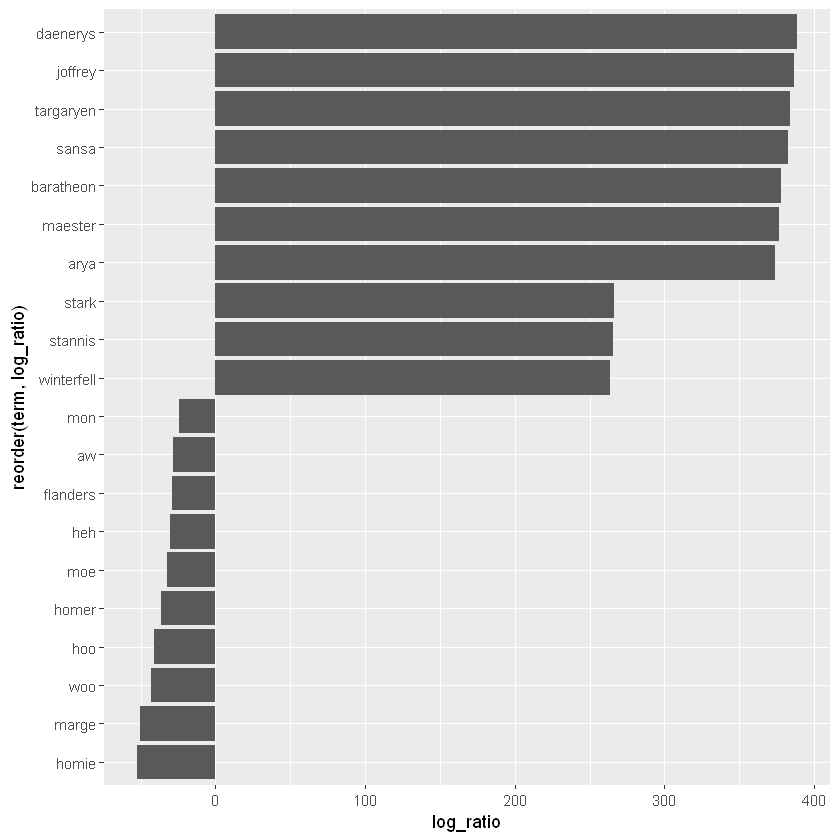

In [25]:
# Diferencia de probabilidades ("beta") de palabras entre tópicos
dif_beta <- topicos_lda_beta %>%
  mutate(topic = paste0("topic", topic)) %>%
  spread(topic, beta) %>%
  filter(topic1 > .001 | topic2 > .001) %>%
  mutate(log_ratio = log2(topic2 / topic1))  %>%
  arrange(log_ratio)

# Selecciono los 10 mayores y 10 menores log_ratios
sel_beta <- rbind(head(dif_beta, 10), tail(dif_beta, 10))

# Gráfico de diferencias de probabilidades
ggplot(data = sel_beta,
       aes(x = reorder(term, log_ratio), y = log_ratio))+
  geom_bar(stat = "identity") +
  coord_flip()

Se nota claramente la diferencia entre los tópicos. Se puede ver, por ejemplo, que los nombres de los personajes están muy relacionados con uno de los tópicos y es muy poco probable que aparezca en el otro. Esto ayuda a confirmar que los resultados (tópicos) son coherentes con lo esperado.

##  Probabilidades de los documentos en cada tópico
Se pueden examinar las probabilidades de los documentos a partir del valor "gamma". En este caso, cada documento es el diálogo de un personaje de una de las series estudiadas.

In [26]:
personajes_lda_gamma <- tidy(topicos_lda, matrix = "gamma")
head(personajes_lda_gamma)

document,topic,gamma
Homer Simpson,1,0.9990816
Marge Simpson,1,0.9980567
Lisa Simpson,1,0.8320932
Bart Simpson,1,0.9988583
Waylon Smithers,1,0.6330451
C. Montgomery Burns,1,0.9545978


Por ejemplo, el modelo estima que más del 99% de las palabras que comprenden al personaje "Homer Simpson" se generaron a partir del tópico 1, Mientras que el 63 % de las palabras que involucran al personaje "Waylon Smithers" provienen de dicho tópico. Se puede encontrar que la palabra más pronunciada por el personaje Homero Simpson es "Marge".

In [27]:
# Palabras más pronunciadas por Homero Simpson
tidy(dtm) %>%
  filter(document == "Homer Simpson") %>%
  top_n(10) %>%
  arrange(desc(count))

Selecting by count


document,term,count
Homer Simpson,marge,1822
Homer Simpson,hey,959
Homer Simpson,yes,742
Homer Simpson,gonna,732
Homer Simpson,uh,672
Homer Simpson,boy,665
Homer Simpson,time,644
Homer Simpson,kid,616
Homer Simpson,bart,585
Homer Simpson,love,568


### Relación de los documentos con los tópicos

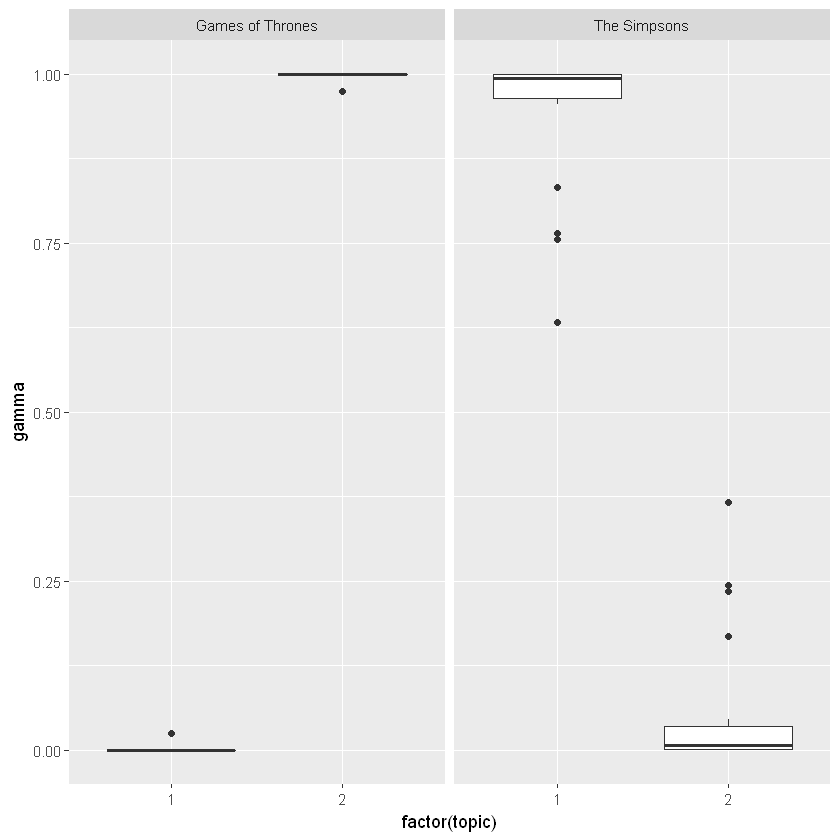

In [28]:
# Agrego columna con nombres de las series para graficar
personajes_lda_gamma <- data.table(personajes_lda_gamma)
personajes_lda_gamma[document %in% personajes_ts , serie := "The Simpsons"    ]
personajes_lda_gamma[document %in% personajes_got, serie := "Games of Thrones"]

# Grafico las relaciones entre los documentos y los tópicos
personajes_lda_gamma %>%
  mutate(title = reorder(serie, gamma * topic)) %>%
  ggplot(aes(factor(topic), gamma)) +
  geom_boxplot() +
  facet_wrap(~ serie)

De acuerdo al gráfico anterior parece que algunos personajes de Los Simpsons están algo asociados al tópico de Games of Thrones. En la tabla siguiente se muestra numéricamente como los personajes "Lisa Simpson", "Waylon Smithers", "C. Montgomery Burns", "Nelson Muntz" y "Seymour Skinner" tienen una probabilidad gamma menor al 99 % con lo cual son relacionados en parte al tópico 2.

In [29]:
# Pobabilidad (gamma) de los documentos (personajes) de provenir de cada tópico
personajes_clasificacion <- personajes_lda_gamma %>%
  group_by(serie, document) %>%
  top_n(1, gamma) %>%
  ungroup()

personajes_clasificacion

document,topic,gamma,serie
Homer Simpson,1,0.9990816,The Simpsons
Marge Simpson,1,0.9980567,The Simpsons
Lisa Simpson,1,0.8320932,The Simpsons
Bart Simpson,1,0.9988583,The Simpsons
Waylon Smithers,1,0.6330451,The Simpsons
C. Montgomery Burns,1,0.9545978,The Simpsons
Moe Szyslak,1,0.9999943,The Simpsons
Nelson Muntz,1,0.7556806,The Simpsons
Ned Flanders,1,0.9935868,The Simpsons
Milhouse Van Houten,1,0.9984949,The Simpsons


## Asignaciones por palabra
Se evalúa si las asignaciones de las palabras a un tópico determinado son correctas o erróneas.

In [30]:
asignaciones <- augment(topicos_lda, data = dtm)
head(asignaciones, 5)

document,term,count,.topic
Homer Simpson,marge,1822,1
Marge Simpson,marge,82,1
Lisa Simpson,marge,2,1
Bart Simpson,marge,5,1
Waylon Smithers,marge,1,1


In [31]:
# Tópicos
topicos_series <- personajes_clasificacion %>%
  count(serie, topic) %>%
  group_by(serie) %>%
  top_n(1, n) %>%
  ungroup() %>%
  transmute(consensus = serie, topic)

# Asignaciones
asignaciones <- asignaciones %>%
  inner_join(topicos_series, by = c(".topic" = "topic"))

# Agrego columna con nombres de las series
asignaciones <- data.table(asignaciones)
asignaciones[document %in% personajes_ts , serie := "The Simpsons"    ]
asignaciones[document %in% personajes_got, serie := "Games of Thrones"]

head(asignaciones)

document,term,count,.topic,consensus,serie
Homer Simpson,marge,1822,1,The Simpsons,The Simpsons
Marge Simpson,marge,82,1,The Simpsons,The Simpsons
Lisa Simpson,marge,2,1,The Simpsons,The Simpsons
Bart Simpson,marge,5,1,The Simpsons,The Simpsons
Waylon Smithers,marge,1,1,The Simpsons,The Simpsons
C. Montgomery Burns,marge,11,1,The Simpsons,The Simpsons


In [32]:
# Porcentajes de asignaciones correctas o incorrectas
matriz_asignaciones <- asignaciones %>%
  count(serie, consensus, wt = count) %>%
  group_by(serie) %>%
  mutate(percent = round(n / sum(n) *100, 2))

matriz_asignaciones 

serie,consensus,n,percent
Games of Thrones,Games of Thrones,45230,99.99
Games of Thrones,The Simpsons,4,0.01
The Simpsons,Games of Thrones,6397,2.07
The Simpsons,The Simpsons,302044,97.93


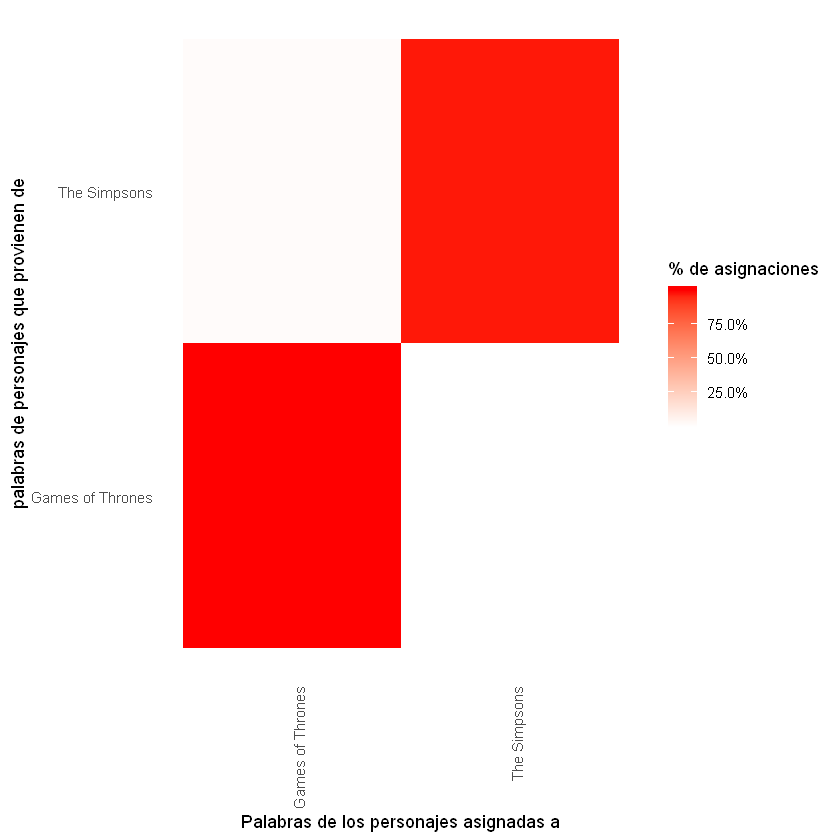

In [33]:
# Gráfico (matriz) de asignaciones
asignaciones %>%
  count(serie, consensus, wt = count) %>%
  group_by(serie) %>%
  mutate(percent = n / sum(n)) %>%
  ggplot(aes(consensus, serie, fill = percent)) +
  geom_tile() +
  scale_fill_gradient2(high = "red", label = percent_format()) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        panel.grid = element_blank()) +
  labs(x = "Palabras de los personajes asignadas a",
       y = "palabras de personajes que provienen de",
       fill = "% de asignaciones")

Se observa en el gráfico como un 2% de palabras que provienen de personajes de Los Simpsons fueron asignadas al tópico de Game of Throne.

### Palabras confundidas

In [34]:
palabras_equivocadas <- asignaciones %>%
  filter(serie != consensus)

palabras_equivocadas %>%
  count(serie, document, consensus, term, wt = count) %>%
  ungroup() %>%
  top_n(10) %>%
  arrange(desc(n))


Selecting by n


serie,document,consensus,term,n
The Simpsons,Waylon Smithers,Games of Thrones,sir,419
The Simpsons,Nelson Muntz,Games of Thrones,haw,273
The Simpsons,Lisa Simpson,Games of Thrones,brother,57
The Simpsons,Lisa Simpson,Games of Thrones,father,40
The Simpsons,Seymour Skinner,Games of Thrones,sir,28
The Simpsons,Seymour Skinner,Games of Thrones,superintendent,27
The Simpsons,Lisa Simpson,Games of Thrones,fight,25
The Simpsons,Lisa Simpson,Games of Thrones,speak,24
The Simpsons,Seymour Skinner,Games of Thrones,lord,24
The Simpsons,Lisa Simpson,Games of Thrones,stacy,23


Por ejemplo la palabra "sir" pronunciada múltiples veces por Waylon Smithers se le asignó pertenecia al tópico 2 (Games of Thrones). Pero se puede verificar que únicamente fue pronunciada por personajes de Los Simpsons con lo cual hay un error en la clasificación del algoritmo.

In [35]:
# Menciones de la palabra "sir"
palabras_cantidad %>%
  filter(word == "sir")

personaje,word,n
Waylon Smithers,sir,419
Homer Simpson,sir,109
Bart Simpson,sir,62
Ned Flanders,sir,38
Apu Nahasapeemapetilon,sir,36
Seymour Skinner,sir,28
Lisa Simpson,sir,25
Kent Brockman,sir,14
Marge Simpson,sir,13
Milhouse Van Houten,sir,10


#### Como conclusión se puede decir que, si bien en este caso se conoce la cantidad real de tópicos, el algoritmo LDA analizado consiguió discriminar de manera no supervisada satisfactoriamente los tópicos esperados (series). Solamente un 2% de palabras que provienen de diálogos de Los Simpsons fueron asignadas a documentos (personajes) de Games of Thrones. 